In [1]:
import pandas as pd

## Read weather data

In [15]:
data = pd.read_csv("../dataset/lab1/weather_data.csv")
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


Now we will build decision tree model to predict weather data.

In [16]:
y = data["Play"]
X = data.drop("Play", axis=1)

In [17]:
X, y

(     Outlook Temperature Humidity    Wind
 0      Sunny         Hot     High    Weak
 1      Sunny         Hot     High  Strong
 2   Overcast         Hot     High    Weak
 3       Rain        Cool   Normal    Weak
 4       Rain        Cool   Normal  Strong
 5      Sunny        Mild     High    Weak
 6      Sunny        Cool   Normal    Weak
 7       Rain        Mild   Normal    Weak
 8      Sunny        Mild   Normal  Strong
 9   Overcast        Mild     High  Strong
 10  Overcast         Hot   Normal    Weak
 11      Rain        Mild     High  Strong
 12  Overcast        Cool   Normal  Strong
 13      Rain        Mild     High    Weak,
 0      No
 1      No
 2     Yes
 3     Yes
 4      No
 5      No
 6     Yes
 7     Yes
 8     Yes
 9     Yes
 10    Yes
 11     No
 12    Yes
 13    Yes
 Name: Play, dtype: object)

In [18]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Convert data into numerical form and build decision tree model.

In [19]:
# Use label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(le.fit_transform)

In [20]:
X

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0
5,2,2,0,1
6,2,0,1,1
7,1,2,1,1
8,2,2,1,0
9,0,2,0,0


Divide the data into training and testing data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Now that we have the model, let's test it on the test data.

In [23]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

We can draw the decision tree to understand the model better.

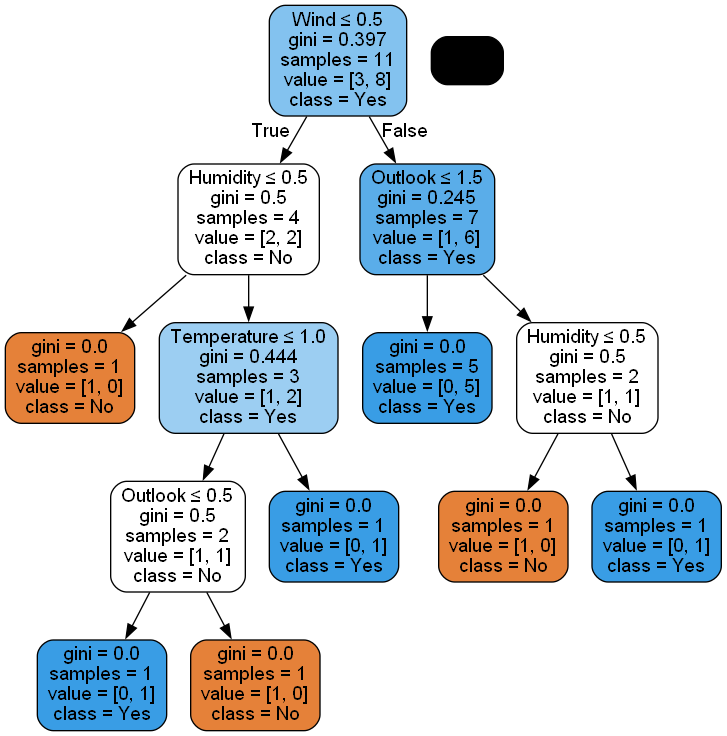

In [25]:
# Draw the tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Homework**: Apply Decision Tree model on the traffic data and predict the traffic (file name: `dataset_traffic_accident_prediction1.csv`).